In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline

import os
import glob
import pandas as pd
import numpy as np
import py2edw

import operator

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [4]:
path = r'C:\Users\wkong\Desktop\Work\customer_segmentation\data\raw'
files = glob.glob(path + '/*.csv')

In [6]:
pt = pd.read_csv(os.path.join(path, 'all_pt_data.csv'))
pt.columns = [i.lower() for i in pt.columns]
pt = pt.dropna()

In [7]:
cust_info = pd.read_csv(os.path.join(path,'all_customer_info.csv'),encoding = "ISO-8859-1")
cust_info.columns = [i.lower() for i in cust_info.columns]

In [8]:
cpath = r'C:\Users\wkong\Desktop\Work\customer_segmentation\data\clean'
files = glob.glob(cpath + '/*.csv')
combined = pd.read_csv(os.path.join(cpath,'prepped_customer_data.csv'))

# Product Type

In [7]:
pt_groups = pt.groupby(['dept','pt'],as_index=False).agg({'customer_id':'count', 'sales':'mean'})

[]

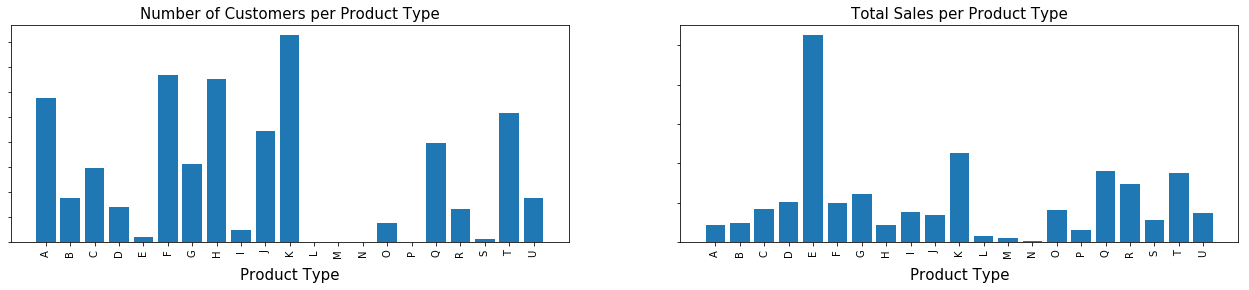

In [8]:
data = pt_groups
fig = plt.figure(figsize=(22,4))

ax = plt.subplot(121)
ax.set_title('Number of Customers per Product Type', fontsize=15)
plt.bar(data.pt, data.customer_id)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Product Type', fontsize=15, labelpad=10)
ax.set_yticklabels([])

ax = plt.subplot(122)
ax.set_title('Total Sales per Product Type', fontsize=15)
plt.bar(data.pt, data.sales)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Product Type', fontsize=15, labelpad=10)
ax.set_yticklabels([])

# Customer Location

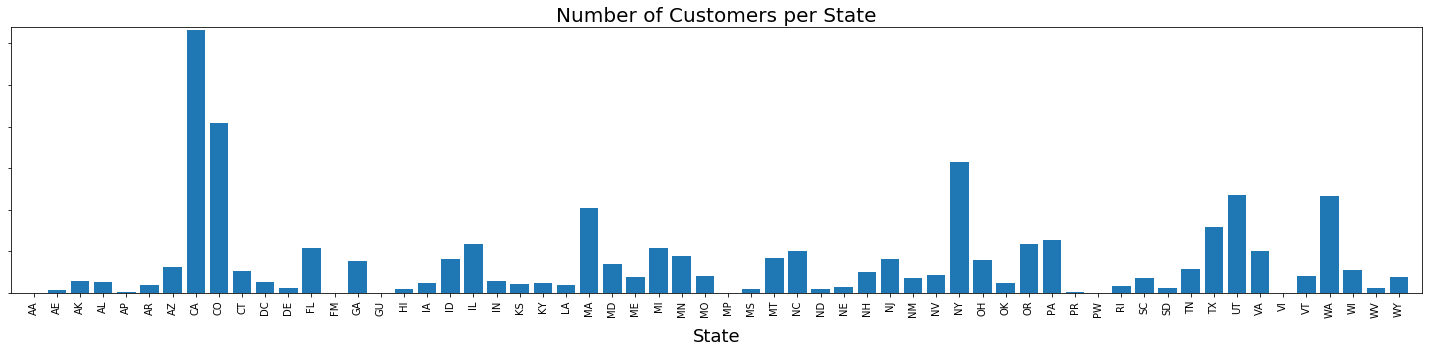

In [10]:
fig = plt.figure(figsize=(20,5))

data = cust_info.groupby('state', as_index=False).agg({'customer_id':'nunique'})

ax = plt.subplot()
ax.set_title('Number of Customers per State', fontsize=20)
plt.bar(data.state, data.customer_id)
plt.xticks(rotation=90)
ax.set_yticklabels([])
plt.xlabel('State', fontsize=18, labelpad=10)
plt.tight_layout()

plt.margins(0.01)


In [17]:
pt_location = pt.merge(cust_info, on=['customer_id'])

Text(0,0.5,'Unique Product Types Purchased')

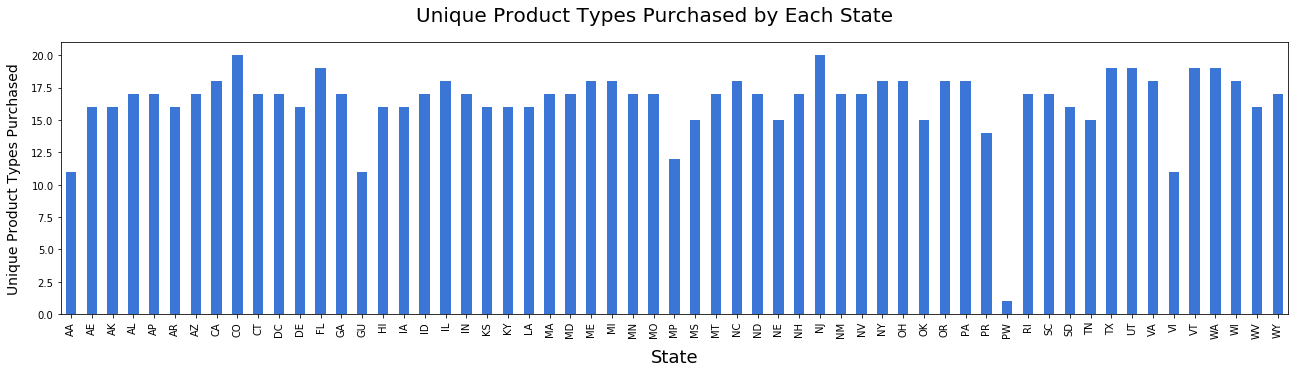

In [18]:
pt_location.groupby('state').pt.nunique().plot.bar(figsize=(22,5), color='#3b76d6', )
_ = plt.suptitle('Unique Product Types Purchased by Each State', fontsize=20)
plt.xlabel('State', fontsize=18, labelpad=10)
plt.ylabel('Unique Product Types Purchased', fontsize=14, labelpad=10)


# Product Type by State

C:\Users\wkong\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


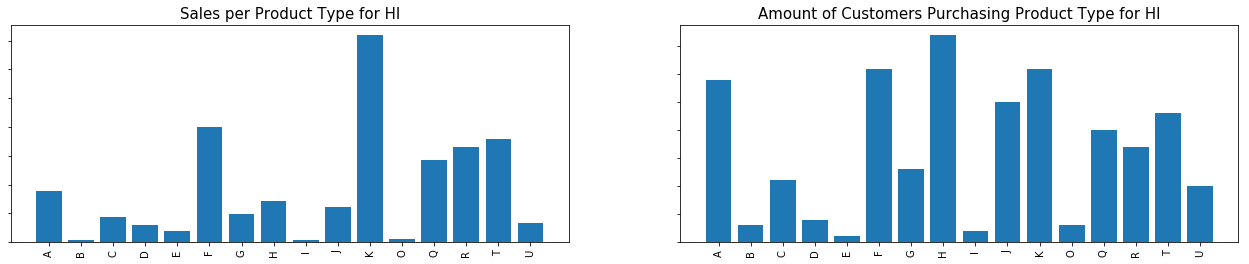

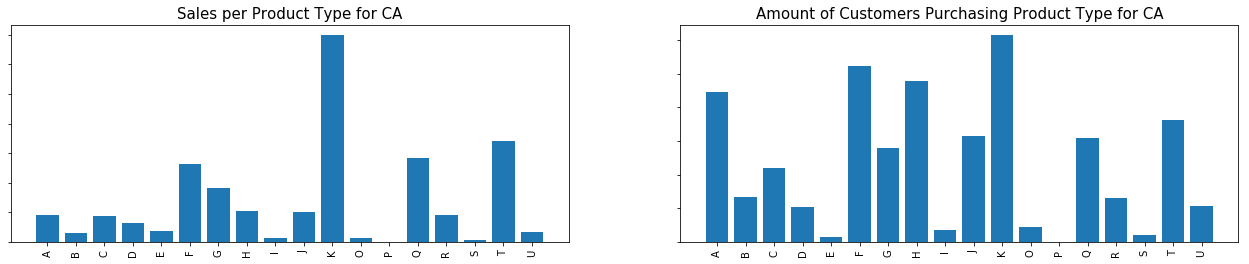

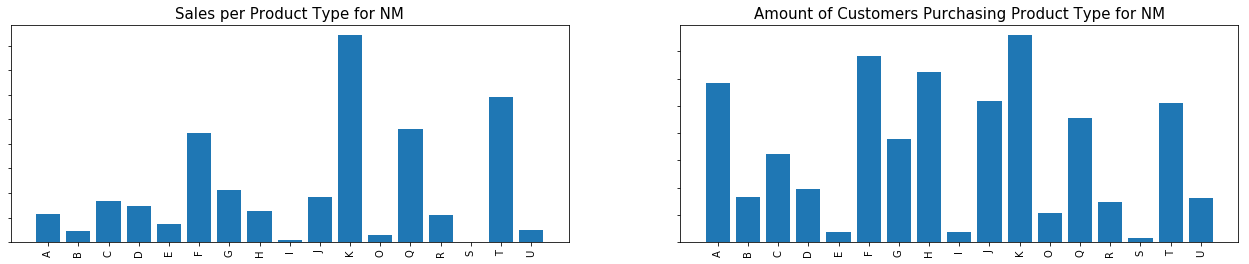

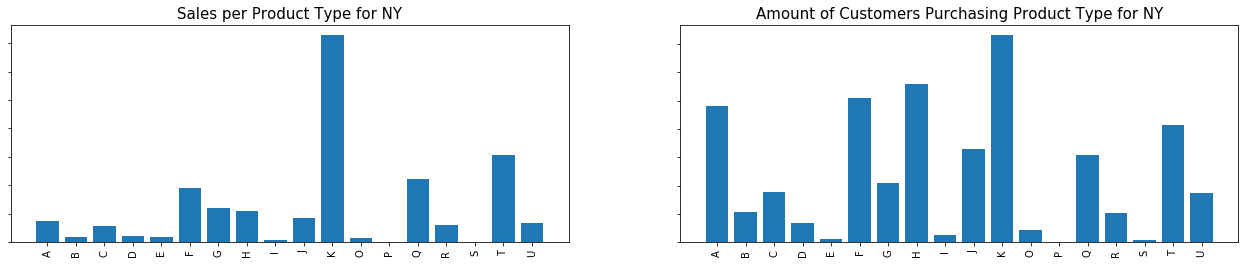

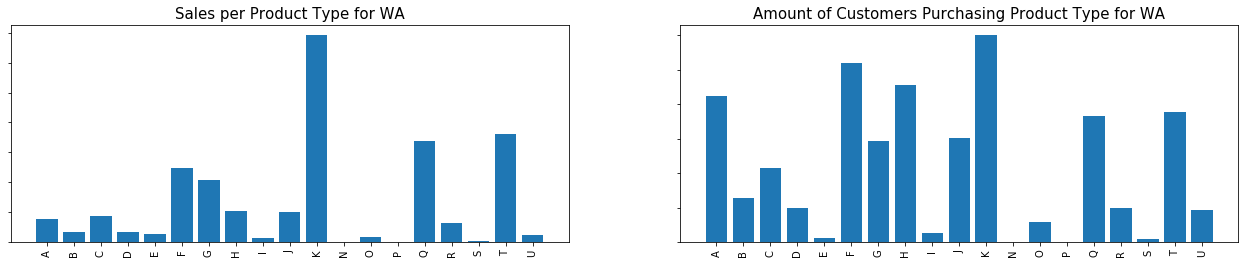

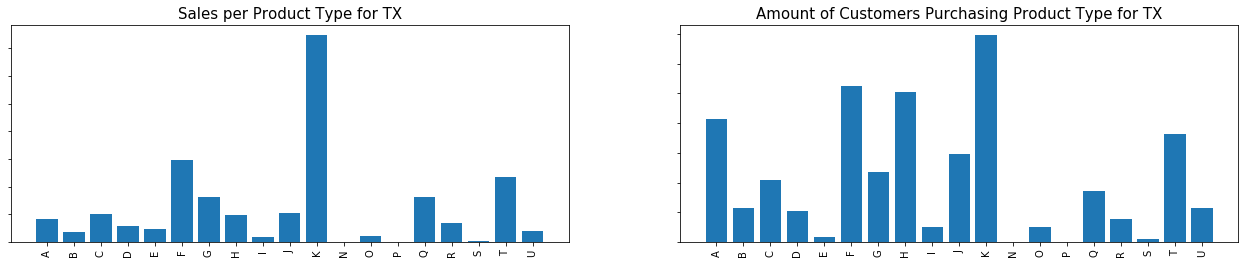

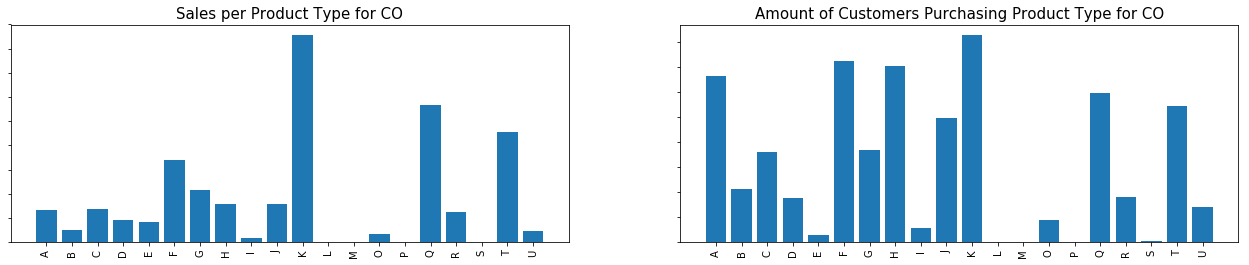

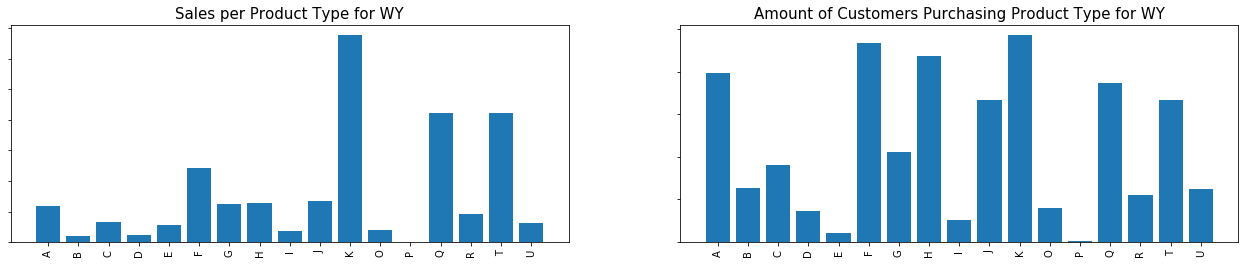

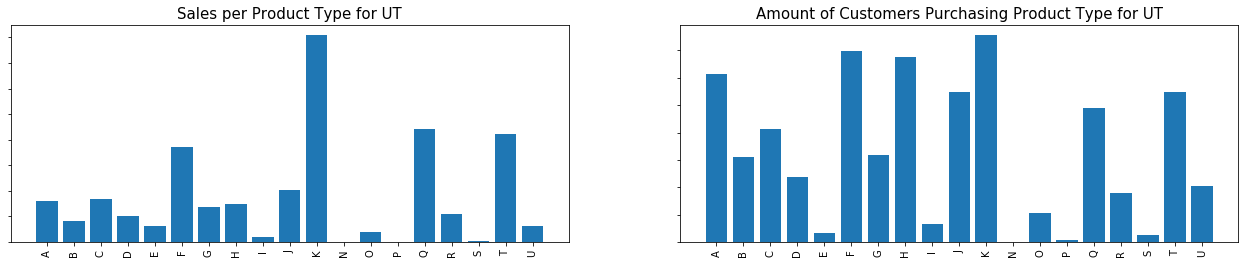

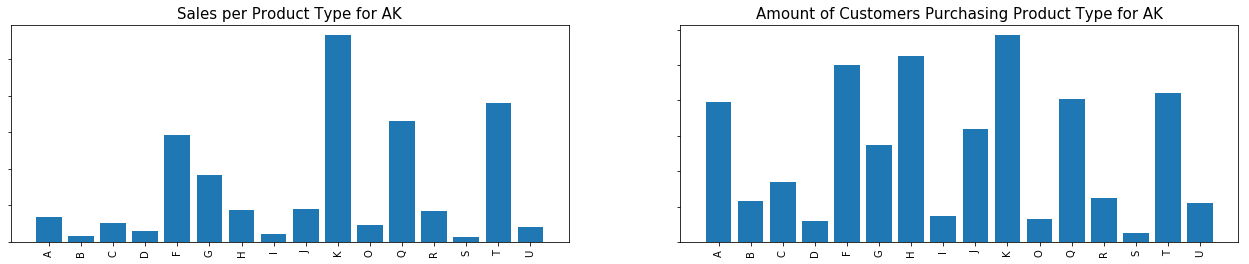

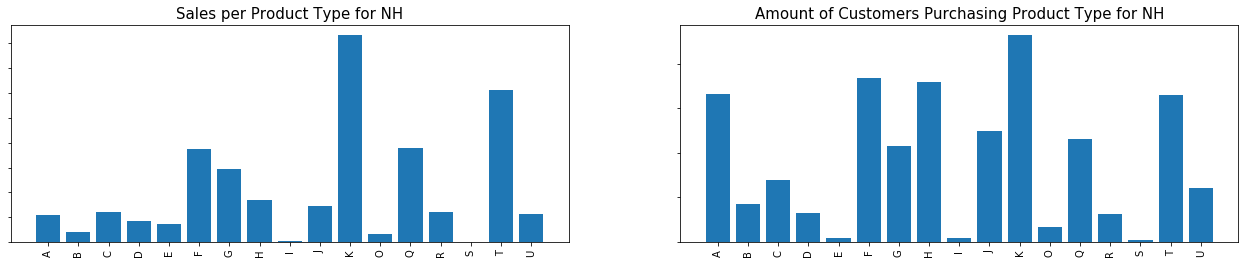

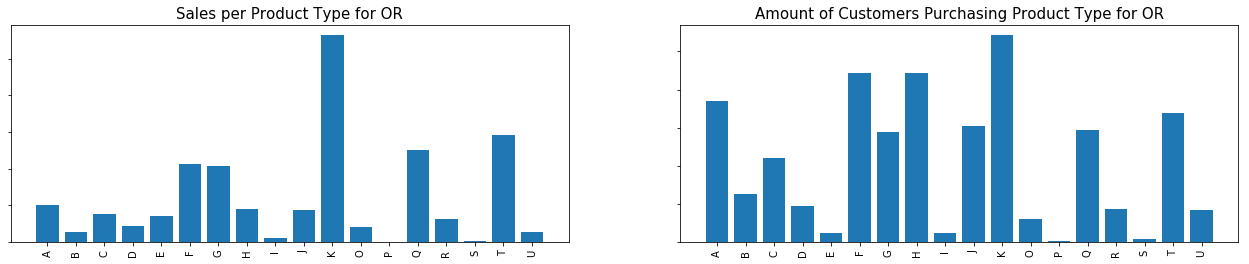

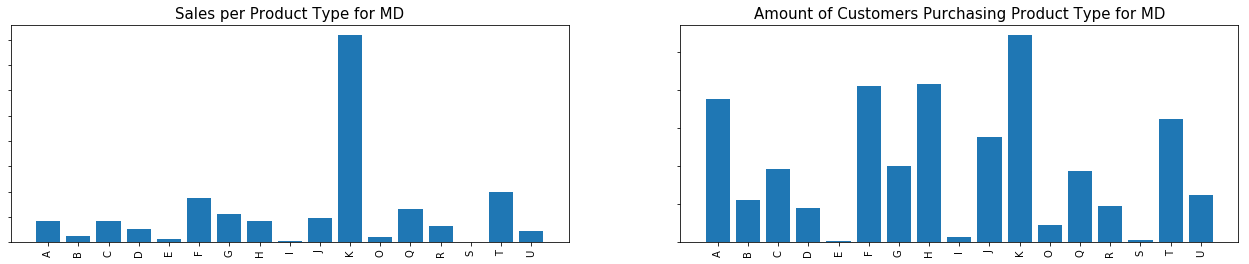

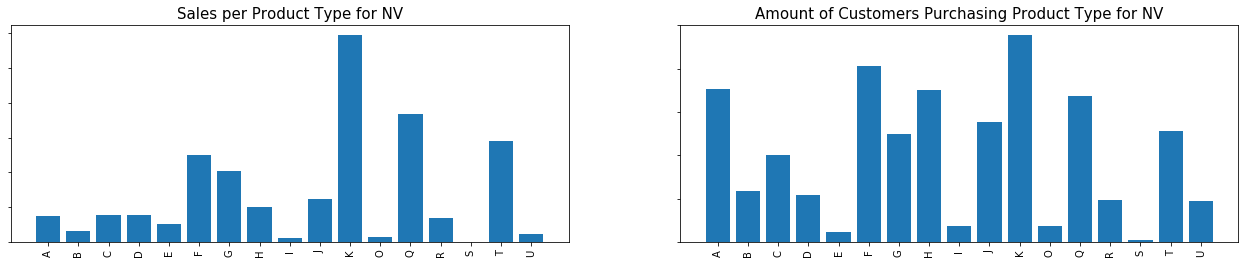

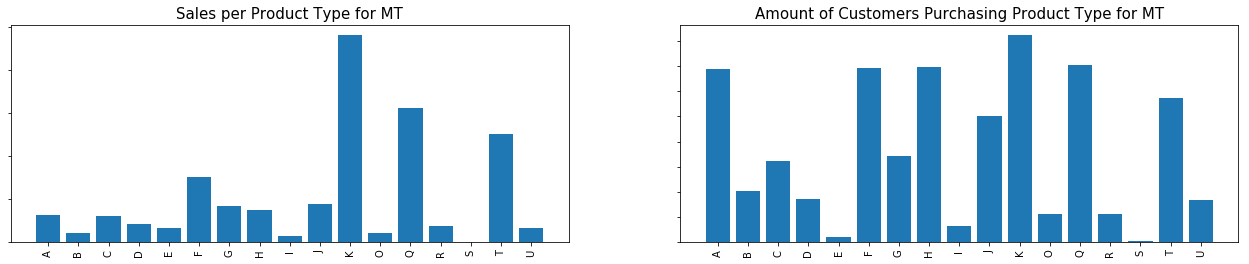

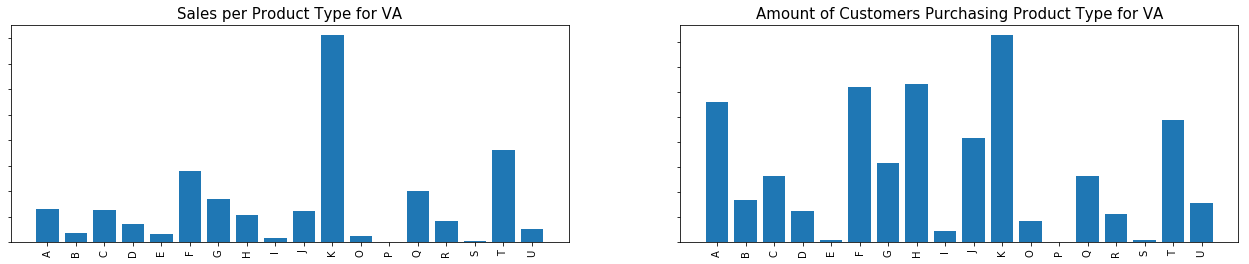

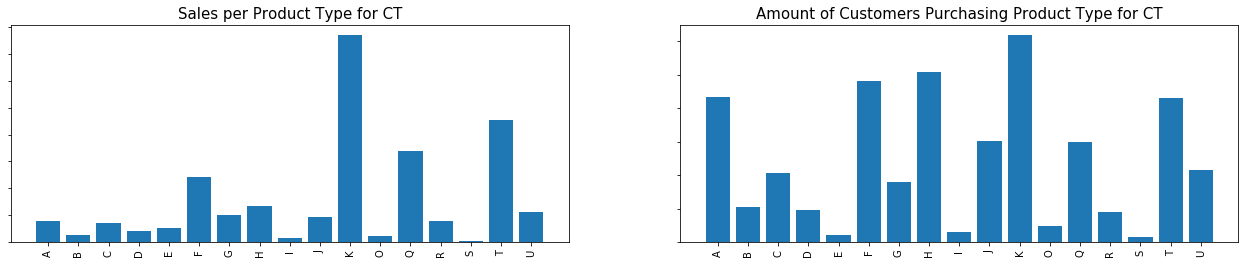

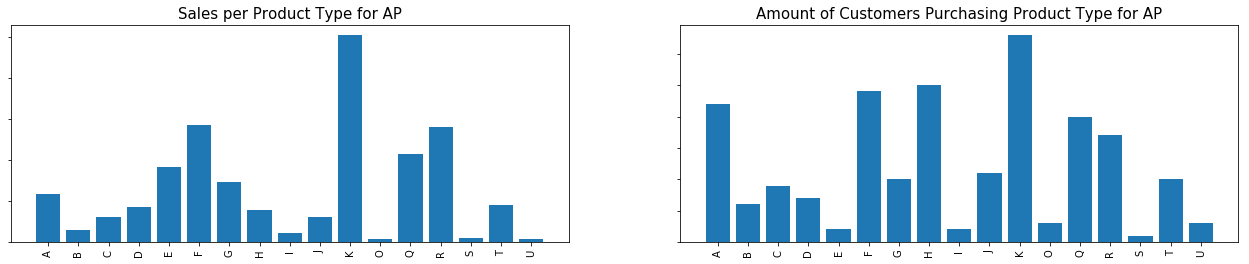

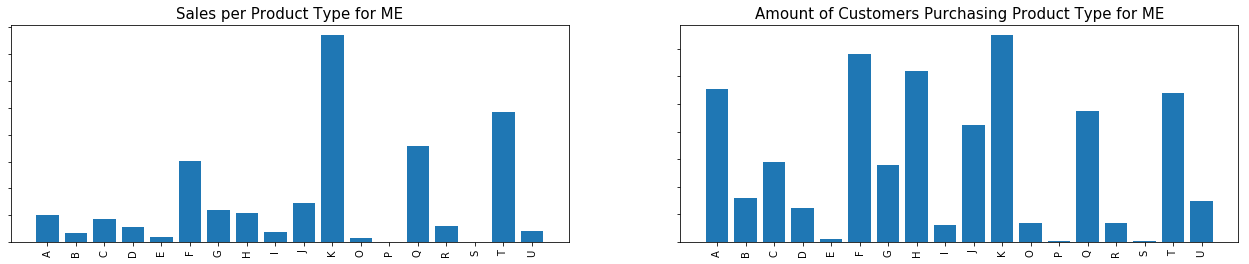

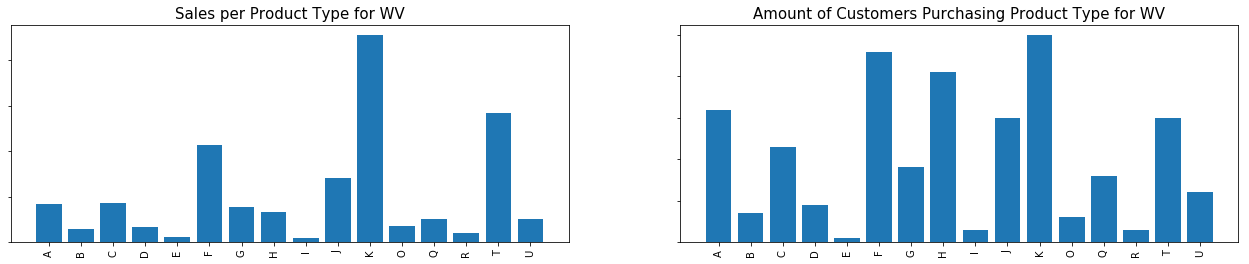

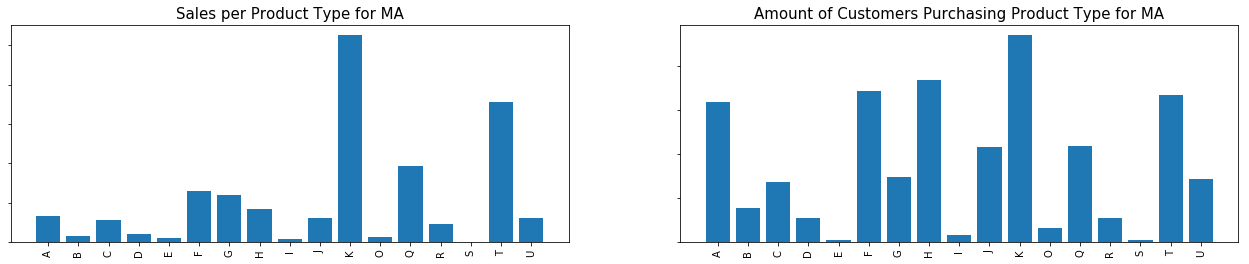

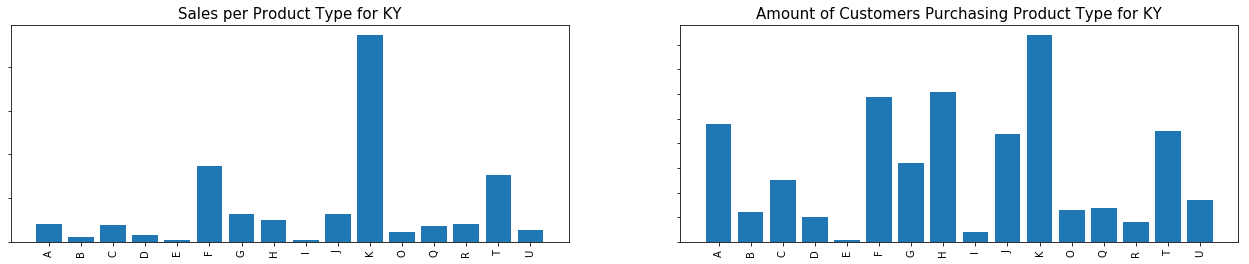

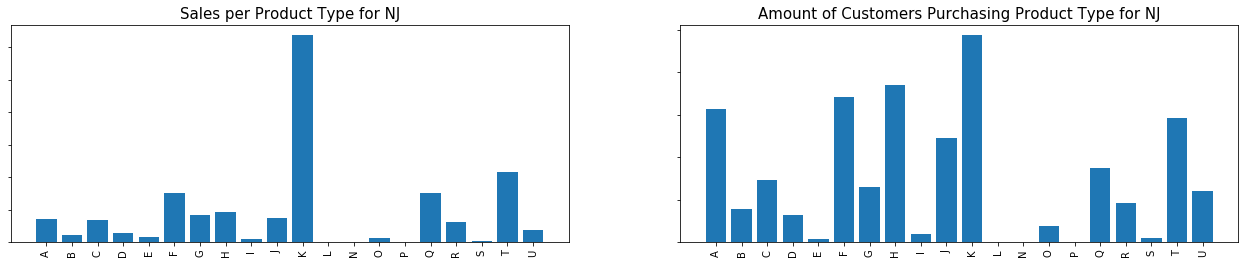

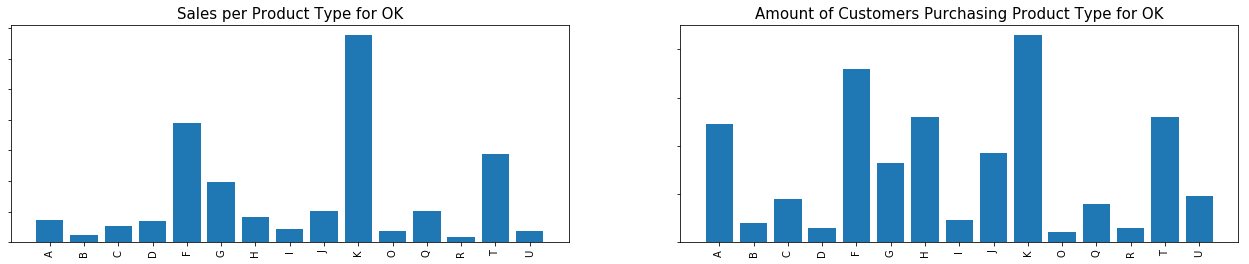

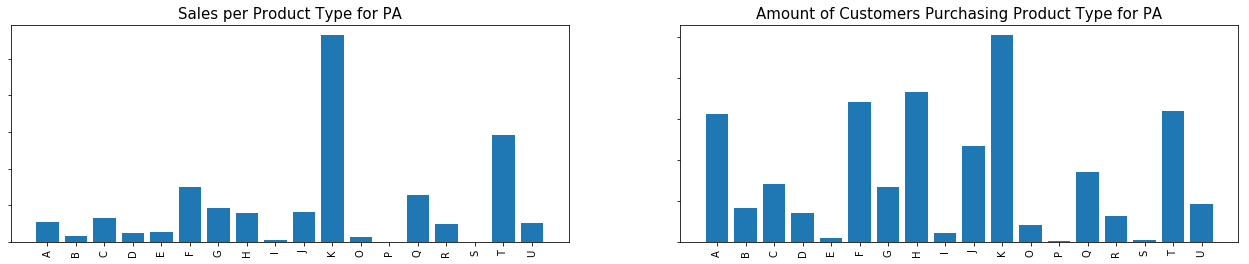

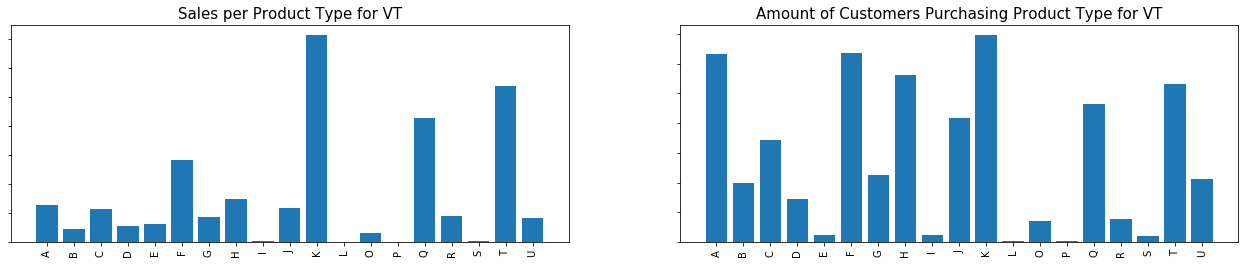

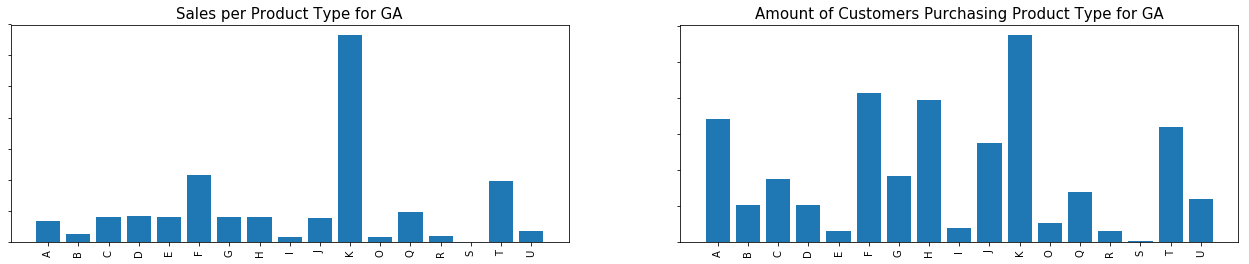

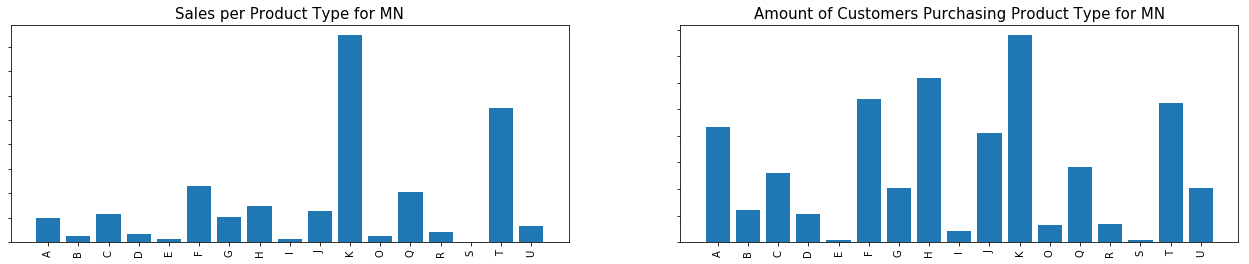

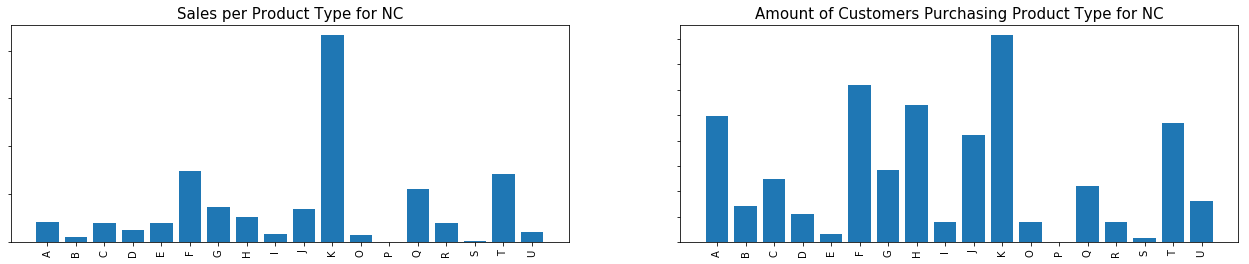

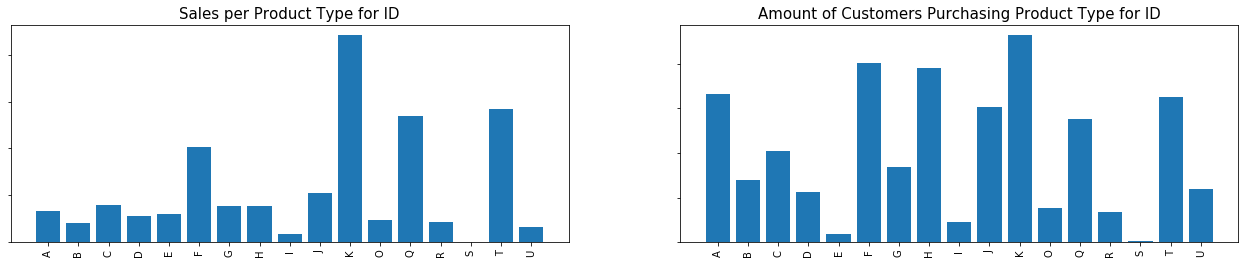

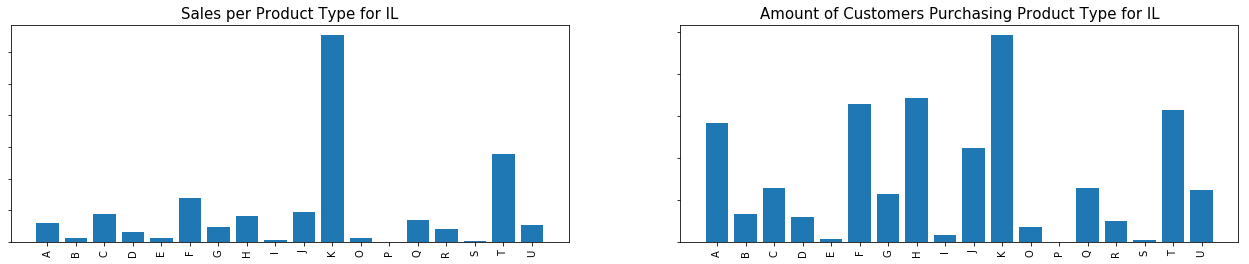

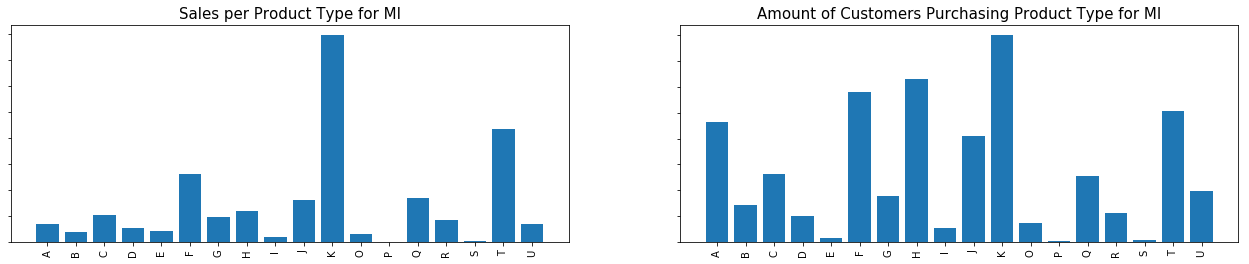

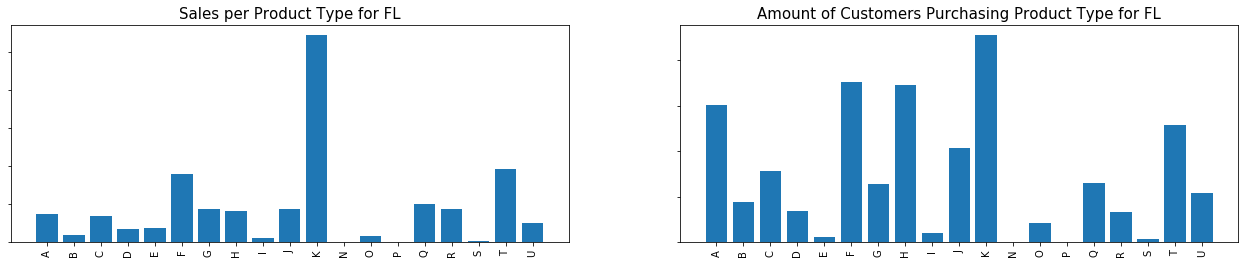

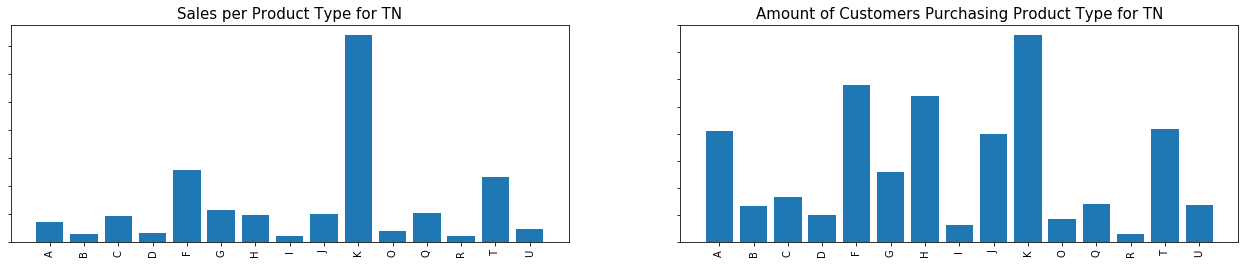

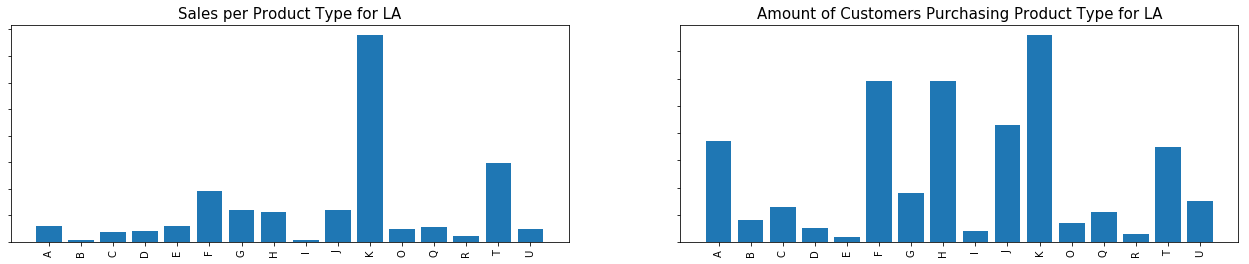

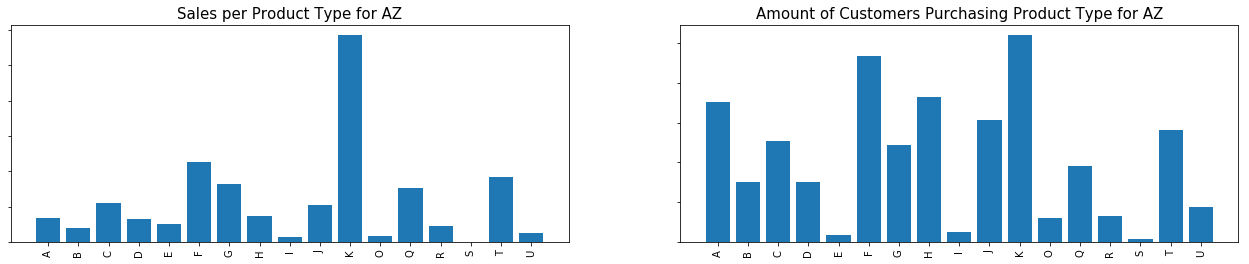

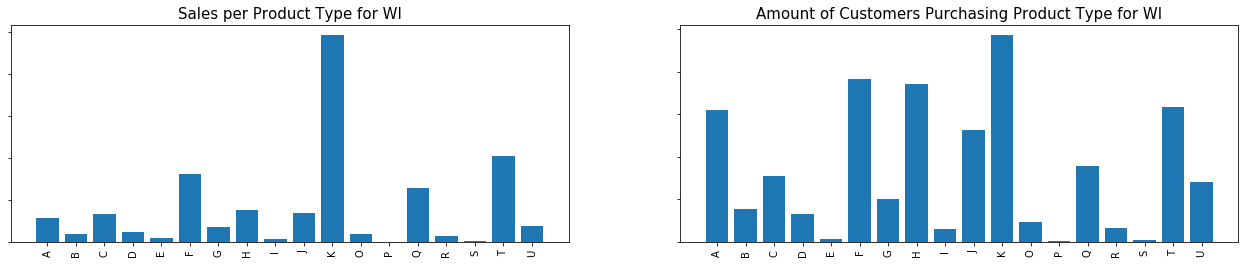

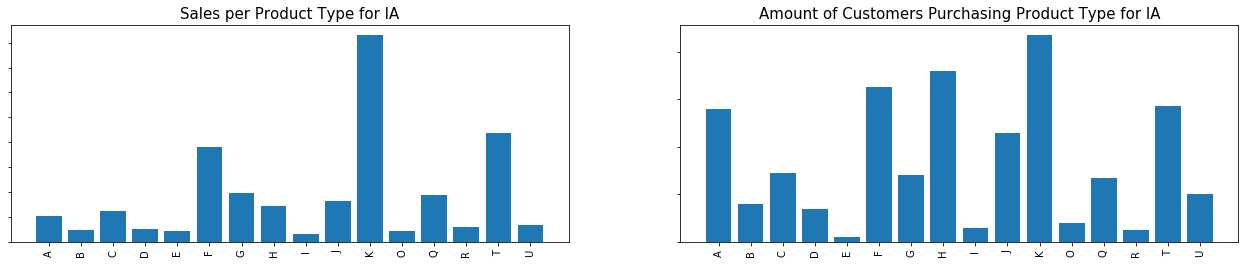

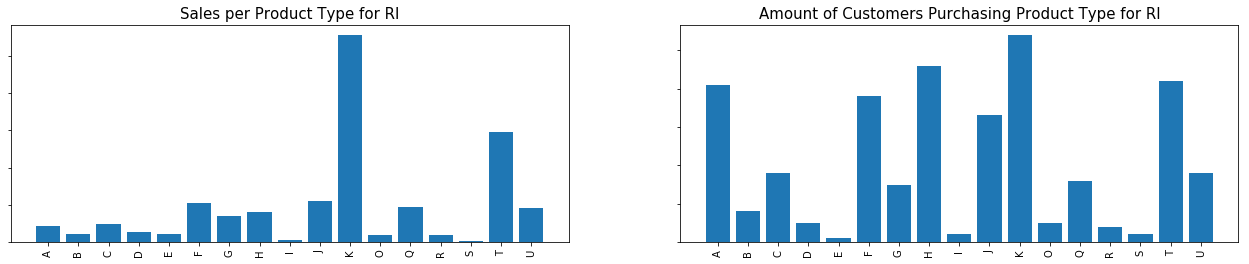

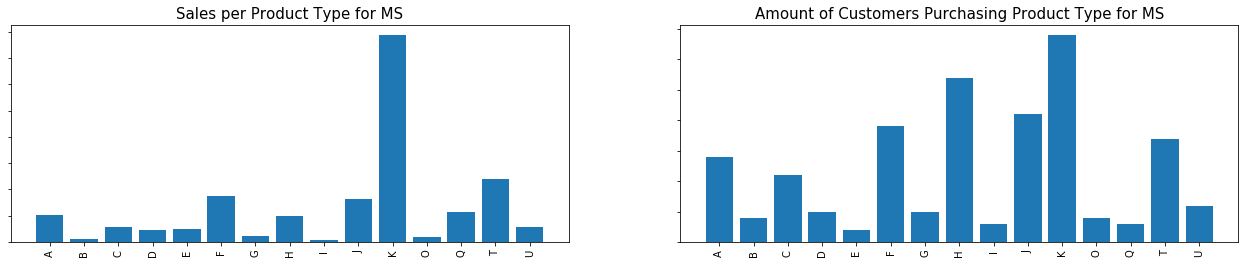

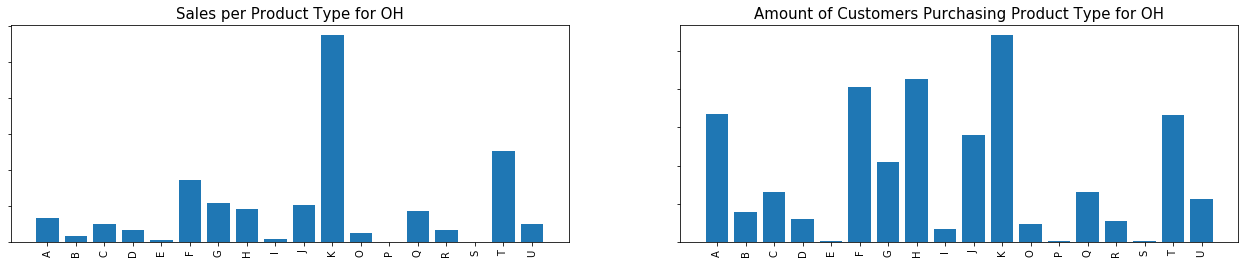

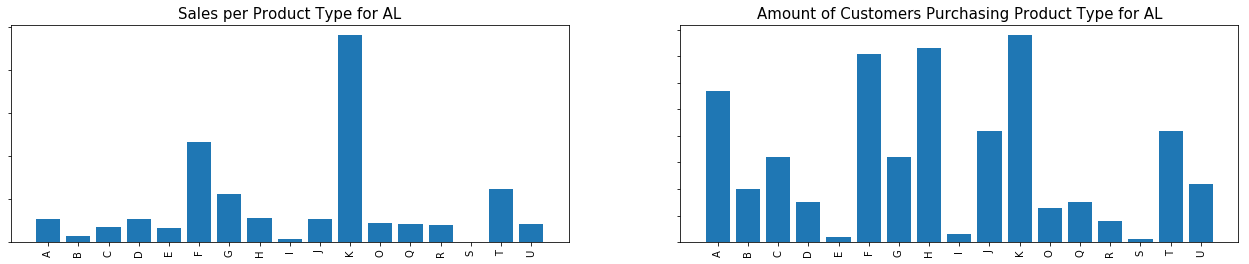

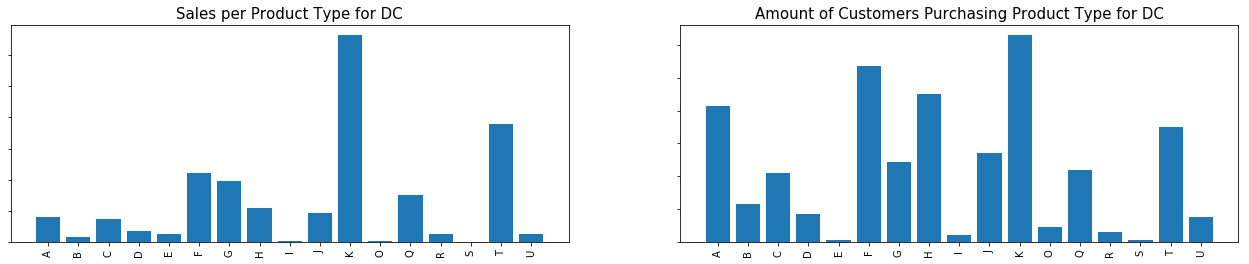

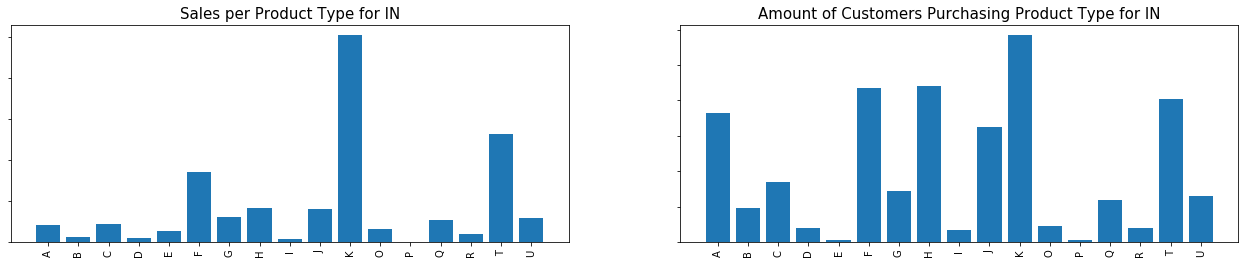

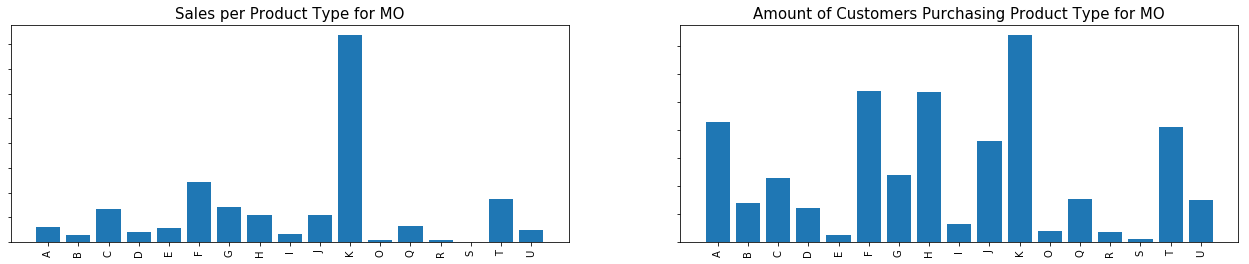

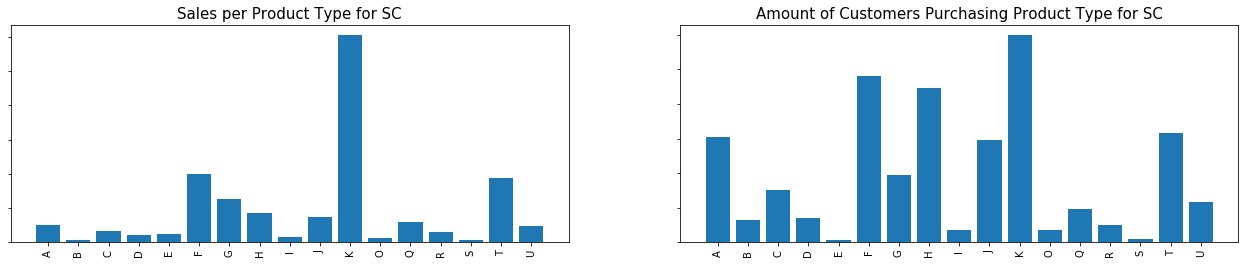

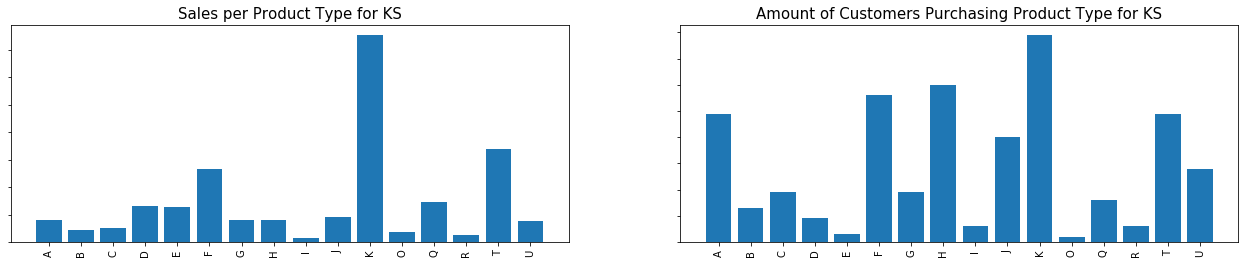

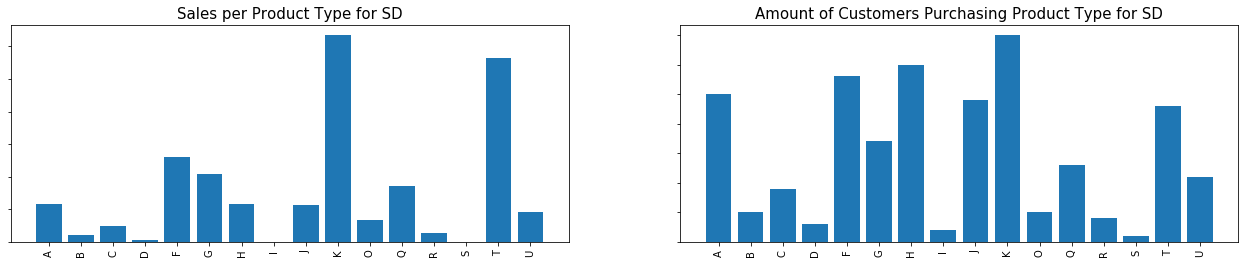

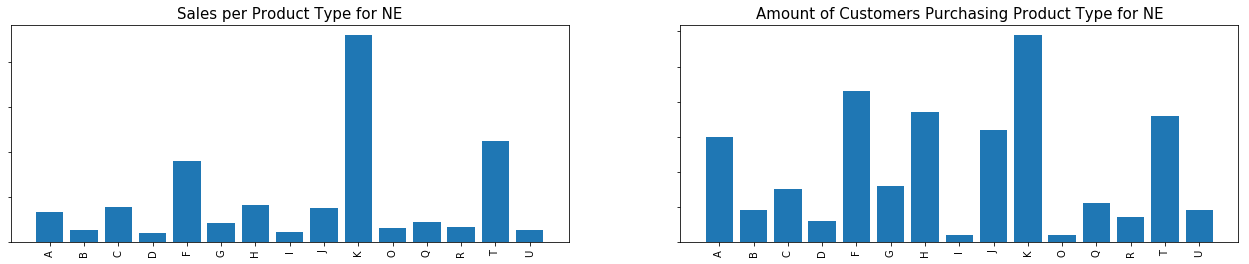

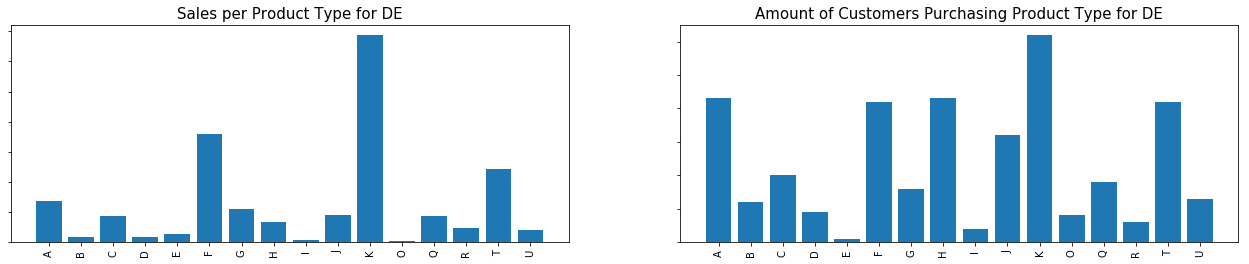

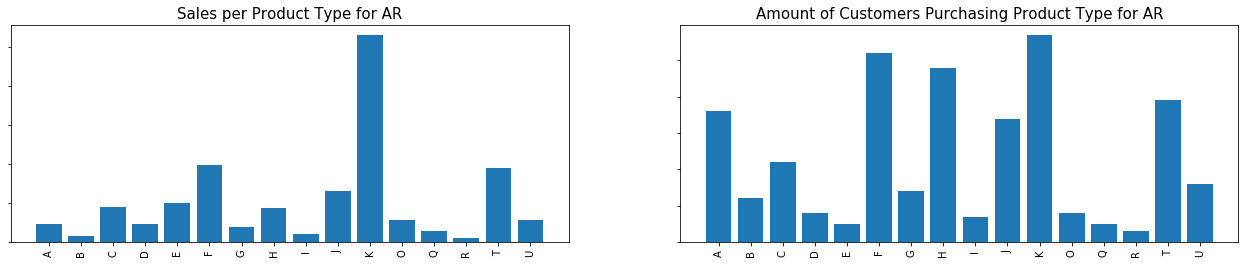

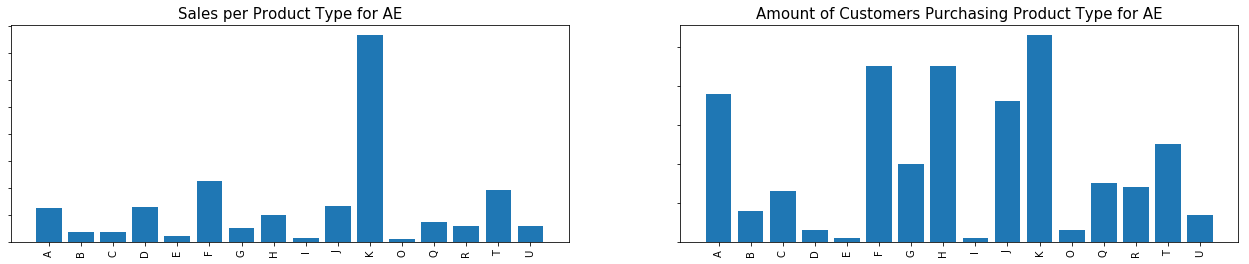

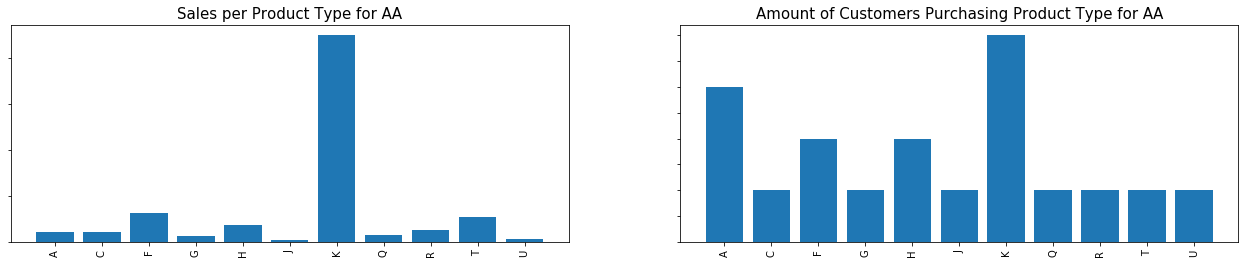

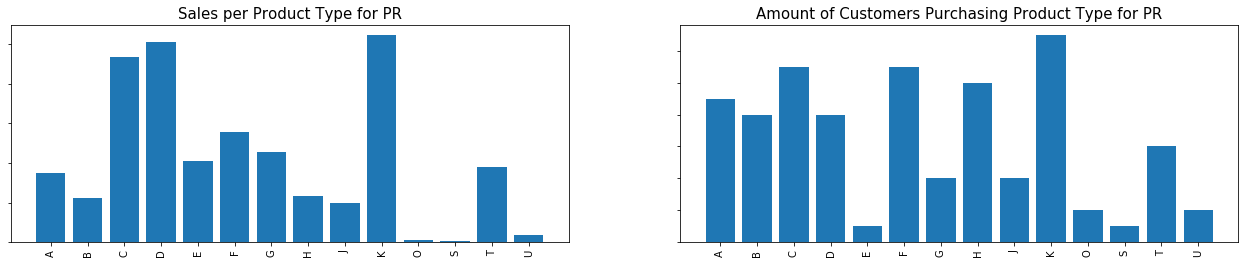

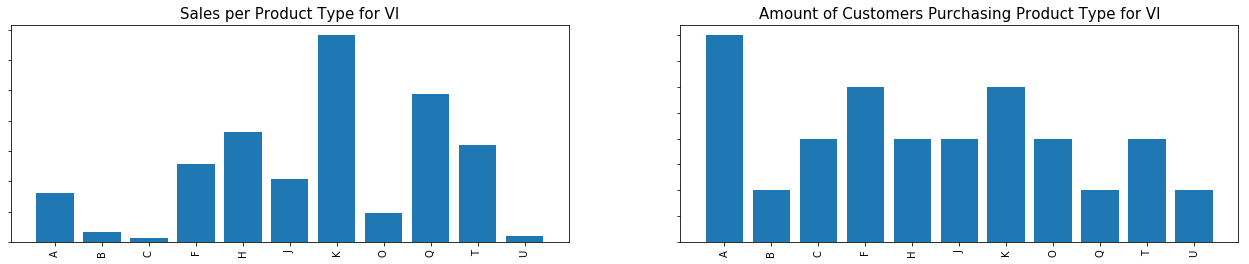

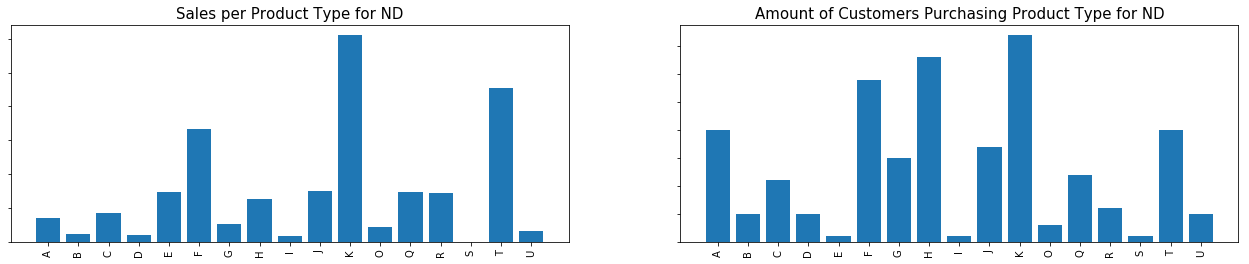

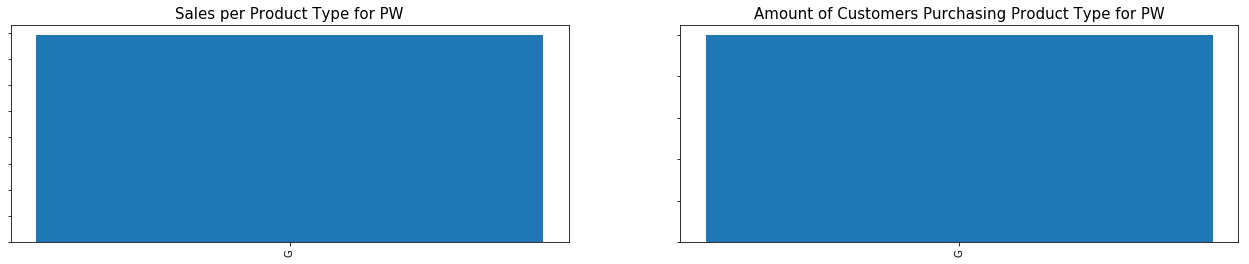

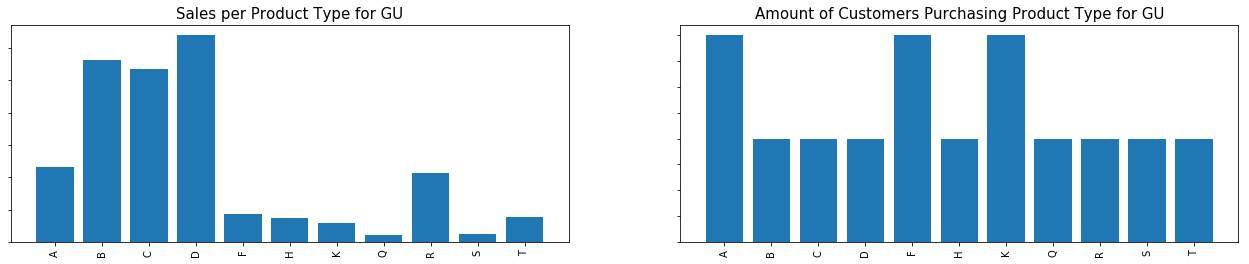

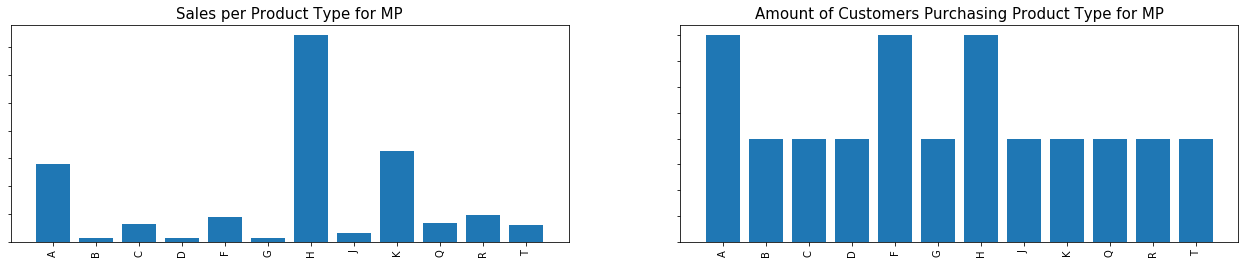

In [19]:
for state in tqdm(pt_location.state.unique()):
    data = pt_location[pt_location.state==state].groupby('pt', as_index=False).agg({'sales':'sum','customer_id':'nunique'})
    fig = plt.figure(figsize=(22,4))
        
    ax = plt.subplot(121)
    ax.set_title('Sales per Product Type for {}'.format(state), fontsize=15)
    plt.bar(data.pt, data.sales)
    plt.xticks(rotation=90)
    ax.set_yticklabels([])
    
    ax = plt.subplot(122)
    ax.set_title('Amount of Customers Purchasing Product Type for {}'.format(state), fontsize=15)
    plt.bar(data.pt, data.customer_id)
    plt.xticks(rotation=90)
    ax.set_yticklabels([])
    plt.savefig('product_type_hist_for_{}.png'.format(state))

In [24]:
groups = pt_location.groupby(['state','pt'],as_index=False).agg({'customer_id':'nunique','sales':'mean'})

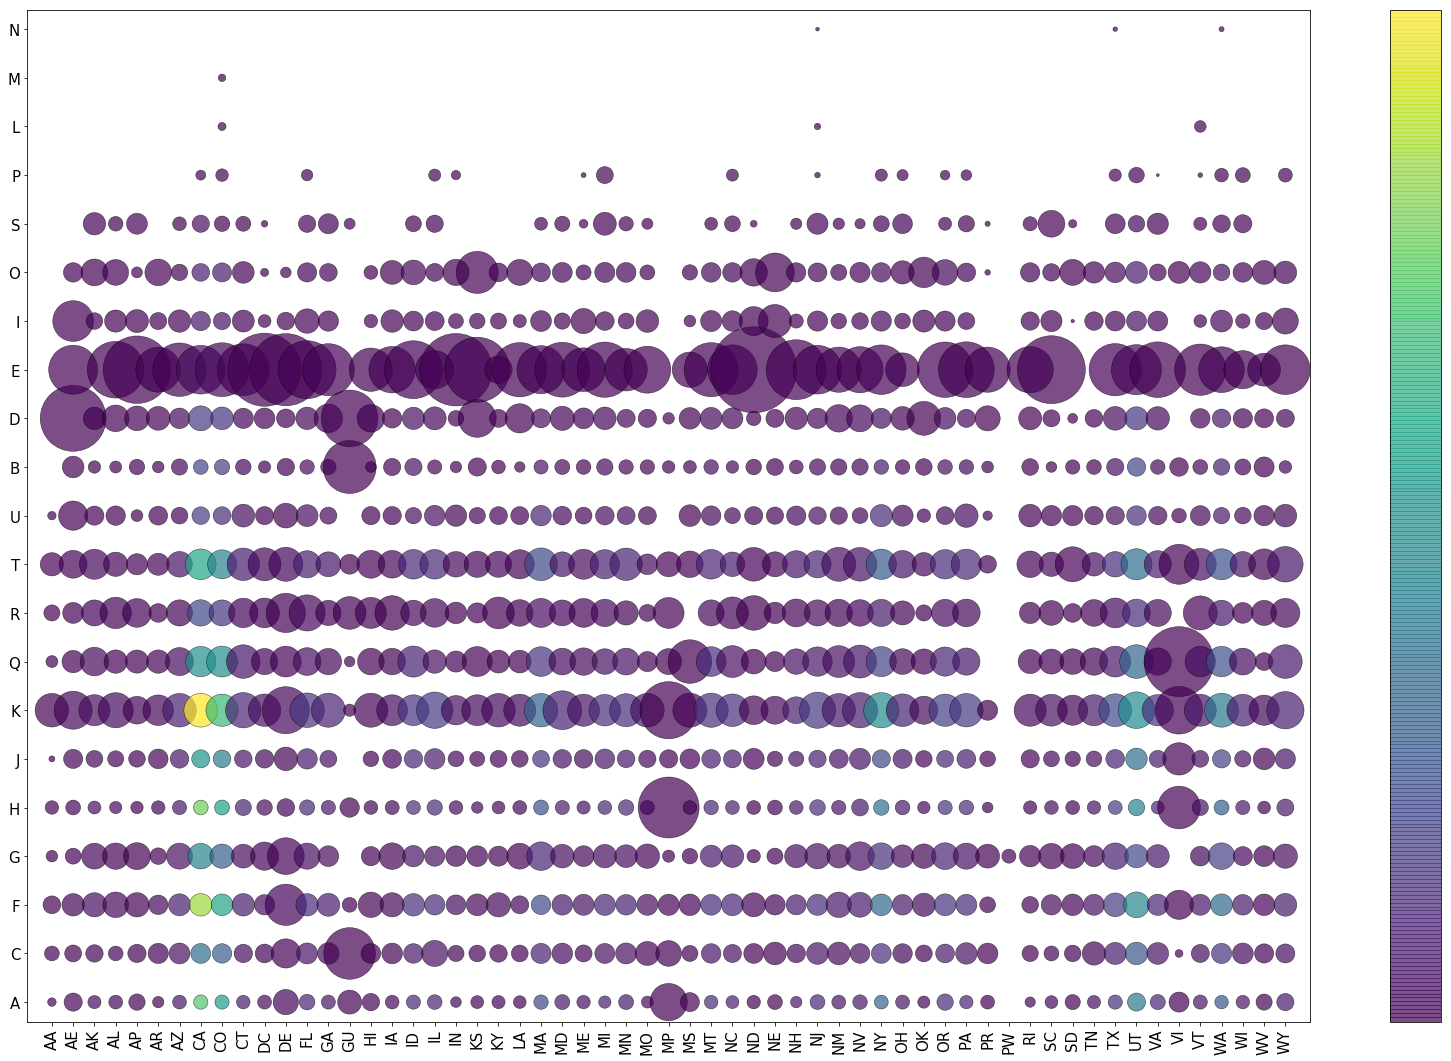

In [25]:
data = groups
fig, ax = plt.subplots(1, figsize=(23, 15))
plt.rcParams.update({'font.size': 15})
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(data.state, data.pt, s=data.sales, c=data.customer_id, alpha=0.7, lw=0.5, edgecolor='black')
cb = plt.colorbar(sc)
cb.set_ticks([])
_ = plt.xticks(rotation=90)
plt.tight_layout()
plt.margins(0.02)

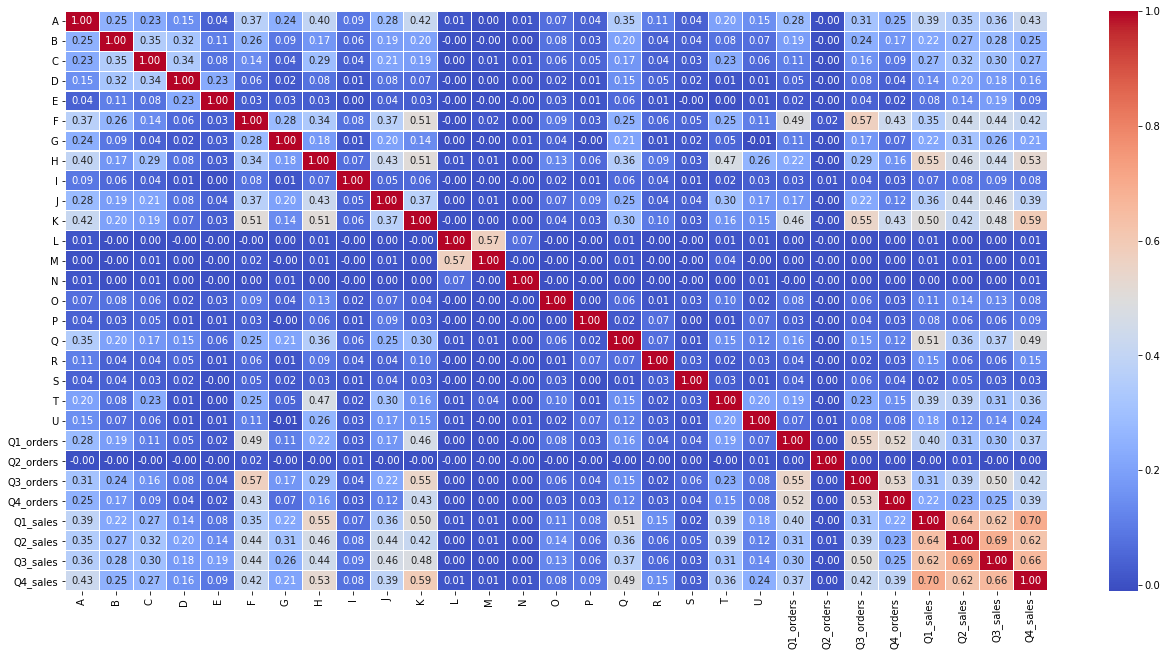

In [83]:
f, ax = plt.subplots(figsize=(22, 10))
corr = combined.drop('customer_id', axis=1).corr()
plt.rcParams.update({'font.size': 10})
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

# Seasonality

In [11]:
combined_loc = combined.merge(cust_info, on=['customer_id'])

In [12]:
cg = combined_loc.groupby('state').agg({k:'sum' for k in combined_loc.columns if 'Q' in k and len(k) > 1 })
cg = cg[sorted(cg.columns)]

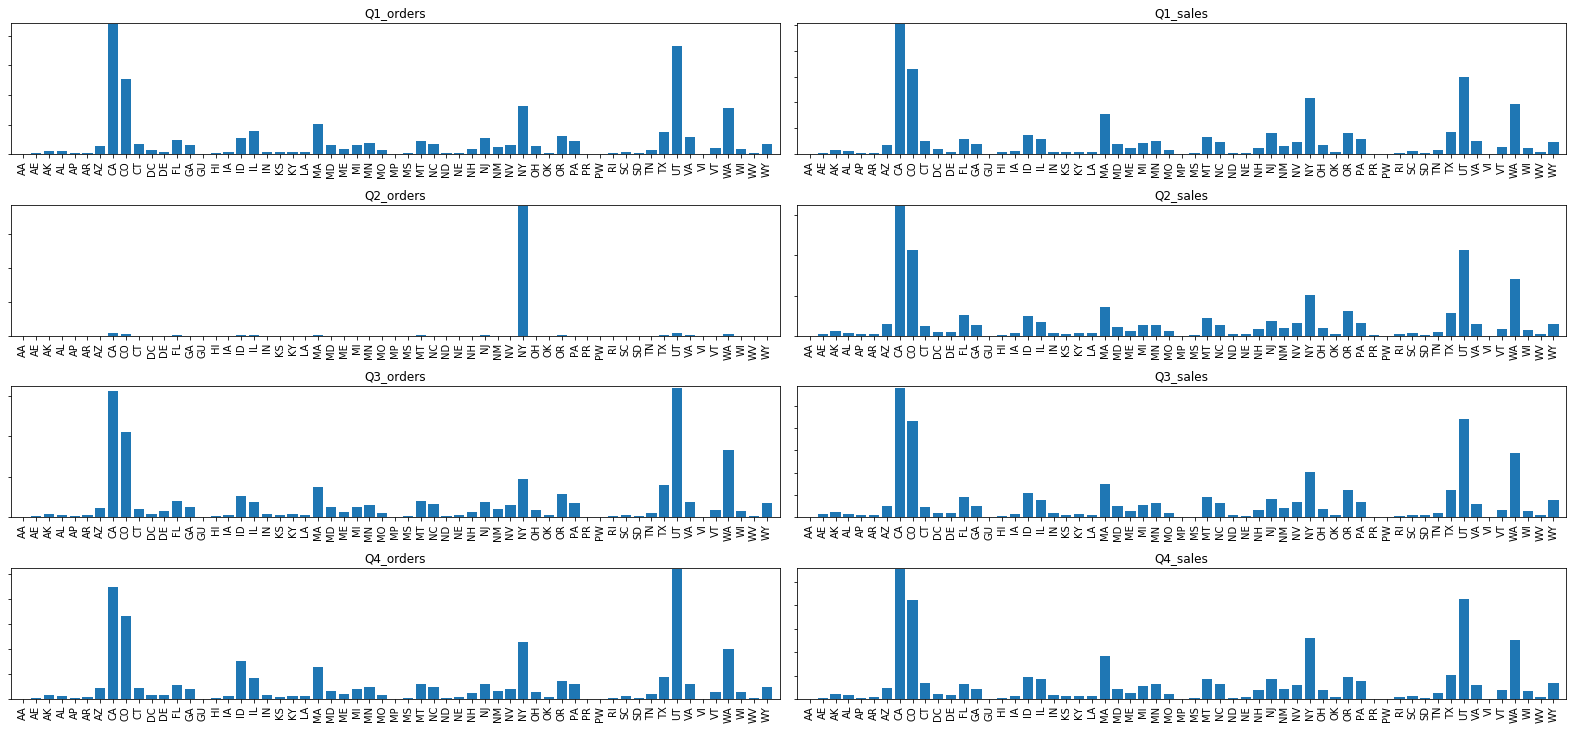

In [22]:
fig = plt.figure(figsize=(22,20))
plt.subplots_adjust(hspace=0.1)
ctr=0
for i in range(len(cg.columns)):
    ax = fig.add_subplot(8, 2, i+1) 
    col = cg.columns[i]
    data = cg[col].reset_index()
    plt.bar(data.state,data[col])
    ax.set_title(col)
    ax.set_yticklabels([])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.margins(0.01)
    ctr+=1   
plt.savefig("stuff.jpg",  format='jpg', dpi=200)
